In [1]:
import numpy as np

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

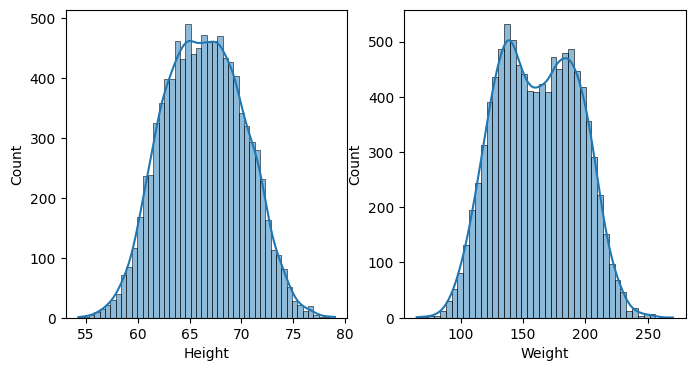

In [8]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df['Height'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['Weight'], kde=True)
plt.show()

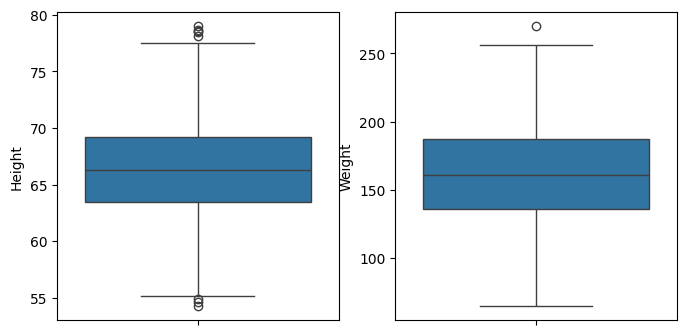

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(df['Height'])

plt.subplot(1,2,2)
sns.boxplot(df['Weight'])
plt.show()

In [10]:
upper_limit= df['Height'].quantile(0.99)
lower_limit= df['Height'].quantile(0.01)


In [11]:
print(upper_limit)
print(lower_limit)


74.7857900583366
58.13441158671655


# **Trimming**

In [17]:
new_df_trim= df[(df['Height'] < np.round(upper_limit, 2) ) & (df['Height'] > np.round(lower_limit, 2))]

In [18]:
new_df_trim

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [19]:
new_df_trim['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

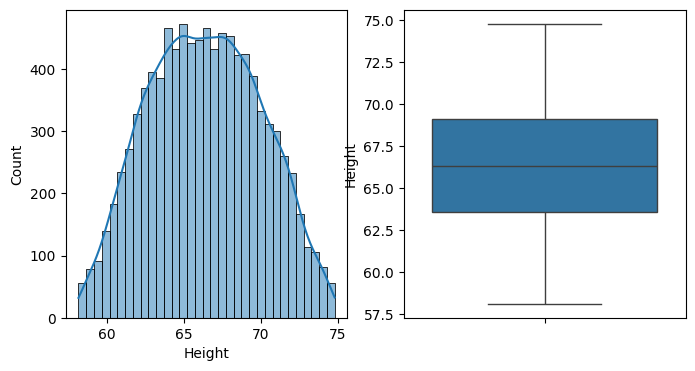

In [20]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(new_df_trim['Height'], kde=True)

plt.subplot(1,2,2)
sns.boxplot(new_df_trim['Height'])
plt.show()

# **Capping : (Winsorization)**

In [22]:
df['Height'] = np.where(
    df['Height']>upper_limit,
    upper_limit,
    np.where(
        df['Height']<lower_limit,
        lower_limit,
        df['Height']
    )
)

In [23]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

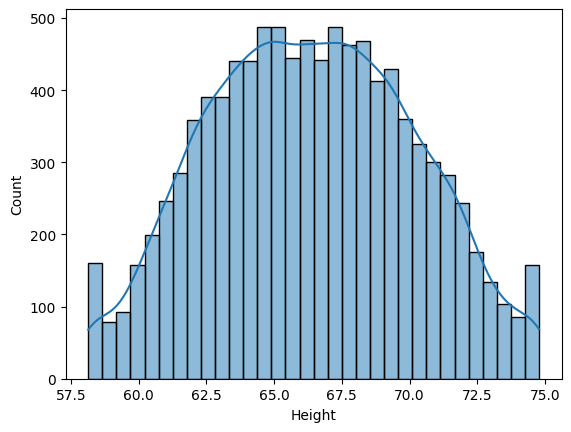

In [24]:
sns.histplot(df['Height'], kde='True')

<Axes: ylabel='Height'>

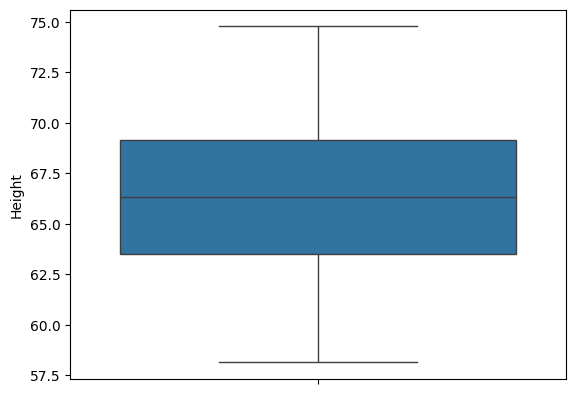

In [25]:
sns.boxplot(df['Height'])
